#**Install conda and rdkit**

#RDKit explaination:
https://chatgpt.com/c/68f49767-4164-8322-8ae4-348a9dda5d7c

In [1]:
#upgrade the pip first
!pip install --upgrade pip




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
#Install the rdkit
!pip install rdkit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 99.6 MB/s  0:00:00


#Load the Bioactivity data (df5) saved in Part1

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Bioactivity_data_curated.csv')
df.head()
# df.shape
# df.dtypes

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active


#**Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, created a simple guideline called the Rule of Five to check if a compound could be a good drug. This rule looks at how the body handles a drug—how it is absorbed, distributed, metabolized, and excreted (ADME). Lipinski studied approved oral drugs and found patterns that help predict if new compounds are likely to work as medicines.

The Lipinski's Rule are the following:
*   **Molecular weight** < 500 Dalton
*   Octanol-water partition coefficient (**LogP**) < 5
*   **Hydrogen bond donors** < 5
*   **Hydrogen bond acceptors** < 10





In [6]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import numpy as np

# mol = Chem.MolFromSmiles("CCO")
# print(mol)


#**Calculate descriptors**

In [63]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

def Lipinski(smiles_list):
    data = []

    for elem in smiles_list:
        mol = Chem.MolFromSmiles(elem)
        if mol:  # skip invalid SMILES
            data.append({
                "MW": Descriptors.MolWt(mol),
                "LogP": Descriptors.MolLogP(mol),
                "NumHDonors": Descriptors.NumHDonors(mol),
                "NumHAcceptors": Descriptors.NumHAcceptors(mol)
            })

    return pd.DataFrame(data)


In [64]:
df_lipinski= Lipinski(df['canonical_smiles'])
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,369.368,3.51522,1,4
1,226.351,3.30451,0,5
2,334.400,3.26220,0,5
3,458.375,2.23320,8,11
4,237.052,2.22770,0,2
...,...,...,...,...
3925,530.625,3.37740,1,5
3926,531.588,3.76988,2,5
3927,526.637,3.81170,1,4
3928,473.577,3.25728,2,4


In [65]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active
...,...,...,...,...
3925,CHEMBL6065869,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)C)C(=O)N3C...,100.0,active
3926,CHEMBL5958100,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)(C)F)C(=O)...,550.0,active
3927,CHEMBL6031391,C#C[C@@H]1C[C@@]2(CN1C(=O)[C@H](CC(C)C)N(C)C(=...,100.0,active
3928,CHEMBL5820046,CC(C)C[C@@H](C(=O)N1C[C@]2(CC1C#N)C(=O)Nc1cccc...,100.0,active


#Difference between axis =0 and axis =1
*   axis=0 → operate vertically (down the rows)
*   axis=1 → operate horizontally (across the columns)


https://chatgpt.com/c/68f50254-1374-8324-a264-6c8b7e99039c

In [66]:
#Combining df and df_lipinski tabel together using concat fuction
df_combined = pd.concat([df,df_lipinski],axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active,369.368,3.51522,1,4
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active,226.351,3.30451,0,5
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active,334.400,3.26220,0,5
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate,458.375,2.23320,8,11
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active,237.052,2.22770,0,2
...,...,...,...,...,...,...,...,...
3925,CHEMBL6065869,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)C)C(=O)N3C...,100.0,active,530.625,3.37740,1,5
3926,CHEMBL5958100,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)(C)F)C(=O)...,550.0,active,531.588,3.76988,2,5
3927,CHEMBL6031391,C#C[C@@H]1C[C@@]2(CN1C(=O)[C@H](CC(C)C)N(C)C(=...,100.0,active,526.637,3.81170,1,4
3928,CHEMBL5820046,CC(C)C[C@@H](C(=O)N1C[C@]2(CC1C#N)C(=O)Nc1cccc...,100.0,active,473.577,3.25728,2,4


#**Convert IC50 to PIC50**
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).
This custom function pIC50() will accept a DataFrame as input and will:



1.   Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
2.   Take the molar value and apply -log10
3. Delete the standard_value column and create a new pIC50 column






In [13]:

# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

# import numpy as np

# def pIC50(input):
#     pIC50 = []

#     for i in input['standard_value_norm']:
#         molar = i*(10**-9) # Converts nM to M
#         pIC50.append(-np.log10(molar))

#     input['pIC50'] = pIC50
#     x = input.drop('standard_value_norm', 1)

#     return x
# print(pIC50)


<function pIC50 at 0x7ec2c4b472e0>


In [67]:
#To convert the IC50 to pIC50 and drop the IC50 column from df_combined table
import numpy as np

def pIC50(df_combined):
    # Convert nM to M and calculate pIC50 directly
    df_combined['pIC50'] = -np.log10(df_combined['standard_value'] * 1e-9)
    # return df_combined

    # Optionally if you wan to drop the original standard_value column
    y = df_combined.drop(columns='standard_value')

    return y

# import pandas as pd
# data = {'standard_value': [100, 500, 1000]}
# df = pd.DataFrame(data)

result = pIC50(df_combined)
result

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1,4,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0,5,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0,5,7.096910
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,intermediate,458.375,2.23320,8,11,5.801343
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0,2,7.397940
...,...,...,...,...,...,...,...,...
3925,CHEMBL6065869,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)C)C(=O)N3C...,active,530.625,3.37740,1,5,7.000000
3926,CHEMBL5958100,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)(C)F)C(=O)...,active,531.588,3.76988,2,5,6.259637
3927,CHEMBL6031391,C#C[C@@H]1C[C@@]2(CN1C(=O)[C@H](CC(C)C)N(C)C(=...,active,526.637,3.81170,1,4,7.000000
3928,CHEMBL5820046,CC(C)C[C@@H](C(=O)N1C[C@]2(CC1C#N)C(=O)Nc1cccc...,active,473.577,3.25728,2,4,7.000000


Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.
i.e. -log10(1000000000*(10**-9)) is -1 which we dont want

In [68]:

#for example if a compound has IC50 of 100,000,000
#lets find out the maximum value of IC50
df_combined.standard_value.describe()

-np.log10((10**-9)*100000000)

#but if have a value >100000000. let's say
-np.log10((10*-9)*1000000000)

/tmp/ipython-input-4171377661.py:8: RuntimeWarning: invalid value encountered in log10
  -np.log10((10*-9)*1000000000)


np.float64(nan)

In [69]:
#i am restricting or capping all the standard value (IC50) more than 100000000 (1e8)
def norm_value(df_combined):
    # Cap values above 100 million (1e8)
    df_combined['standard_value_norm'] = df_combined['standard_value'].clip(upper=1e8)
    # return df_combined

    #optinally if you want to drop the original standard _value column
    y= df_combined.drop(columns='standard_value')
    return y

df_final= norm_value(df_combined)
df_final

# import pandas as pd

# data = {'standard_value': [500, 5e7, 2e8]}
# df = pd.DataFrame(data)
# df
# result = norm_value(df)
# print(result)

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50,standard_value_norm
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1,4,6.408935,390.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0,5,6.677781,210.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0,5,7.096910,80.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,intermediate,458.375,2.23320,8,11,5.801343,1580.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0,2,7.397940,40.0
...,...,...,...,...,...,...,...,...,...
3925,CHEMBL6065869,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)C)C(=O)N3C...,active,530.625,3.37740,1,5,7.000000,100.0
3926,CHEMBL5958100,COc1cccc2[nH]c(C(=O)N(C)[C@@H](CC(C)(C)F)C(=O)...,active,531.588,3.76988,2,5,6.259637,550.0
3927,CHEMBL6031391,C#C[C@@H]1C[C@@]2(CN1C(=O)[C@H](CC(C)C)N(C)C(=...,active,526.637,3.81170,1,4,7.000000,100.0
3928,CHEMBL5820046,CC(C)C[C@@H](C(=O)N1C[C@]2(CC1C#N)C(=O)Nc1cccc...,active,473.577,3.25728,2,4,7.000000,100.0


In [35]:
#saving df_final into csv
df_final.to_csv('Bioactivity_data_pIC50.csv')

#**Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [36]:
#import library
import seaborn as sns
import matplotlib.pyplot as plt


#**Frequency of the bioactivity class**

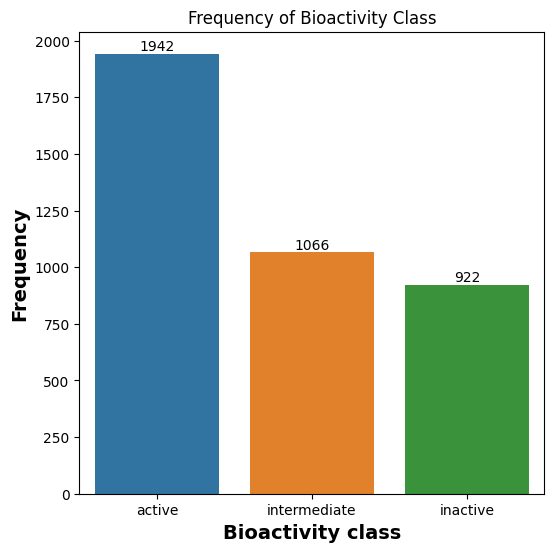

In [70]:
plt.figure(figsize=(6,6))
ax = sns.countplot(data=df_final ,x='class', hue='class')
for bars in ax.containers:
  ax.bar_label(bars)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Frequency of Bioactivity Class')
plt.show()

#**Scatter plot of MW vs LogP**

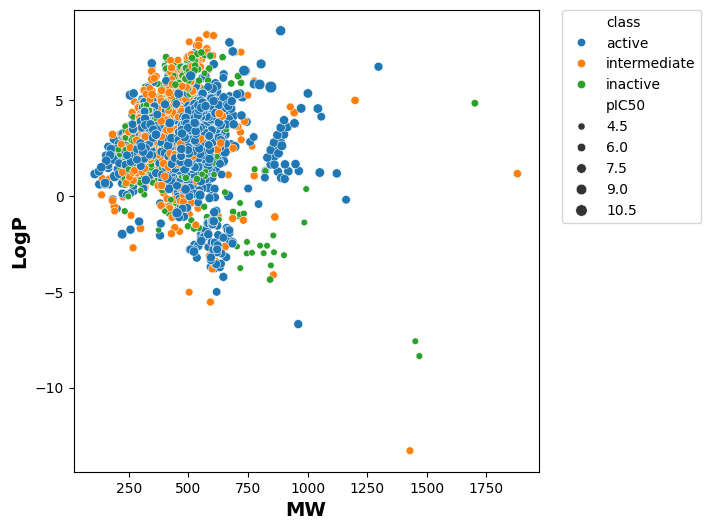

<Figure size 640x480 with 0 Axes>

In [71]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_final, x='MW',y='LogP', hue='class',size='pIC50')

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()
plt.savefig('plot_MW_vs_LogP.pdf')


#Box Plot of pIC50

#Box Plot of pIC50

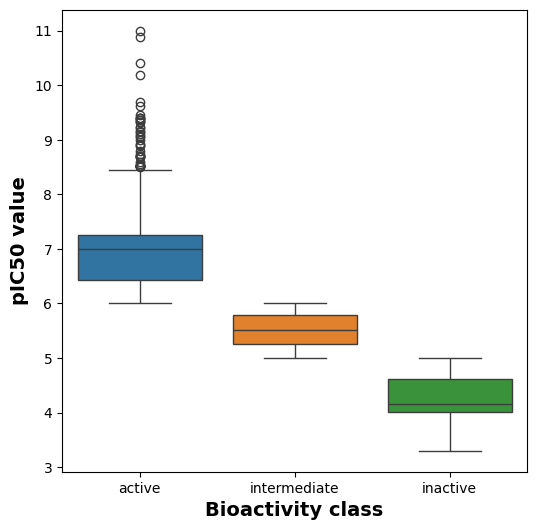

In [72]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df_final, x='class',y='pIC50',hue='class')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.show()

#**Statistical analysis | Mann-Whitney U Test**
The Mann-Whitney U Test is a non-parametric statistical test used to compare differences between two independent groups when the assumption of normality is not met.

Alternative to: Independent samples t-test (used when data is normally distributed).

In [80]:
from scipy.stats import mannwhitneyu
import pandas as pd

def mannwhitney(descriptor):
    # Select only the descriptor and class
    df = df_final[[descriptor, 'class']]

    # Split by class
    active = df[df['class'] == 'active'][descriptor]
    intermediate = df[df['class'] == 'intermediate'][descriptor]
    inactive = df[df['class'] == 'inactive'][descriptor]

    # Example: compare active vs inactive
    stat, p = mannwhitneyu(active, inactive, alternative='two-sided')

    # Interpret the result
    alpha = 0.05
    if p > alpha:
      interpretation = 'Same distribution (fail to reject H0)'
    else:
      interpretation = 'Different distribution (reject H0)'
    # Create results table
    results = pd.DataFrame({
        'Descriptor': [descriptor],
        'Statistics': [stat],
        'p': [p],
        'alpha': [alpha],
        'Interpretation': [interpretation]
    })

    # Save to CSV
    results.to_csv(f'mannwhitneyu_{descriptor}.csv', index=False)

    return results

mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1790524.0,0.0,0.05,Different distribution (reject H0)


#**Kruskal-Wallis H Test (Non-parametric ANOVA)**
Generalization of Mann-Whitney U for 3 or more independent groups.

Tests if at least one group is different from the others.

Before you run kruskal-wallis Test, check for null or missing value for accurate results

In [85]:
df_final['pIC50'].isnull().sum()


np.int64(136)

In [86]:
# Fill the null cells with mean
df_final['pIC50'].fillna(df_final['pIC50'].mean(), inplace=True)

/tmp/ipython-input-3423437530.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['pIC50'].fillna(df_final['pIC50'].mean(), inplace=True)


In [87]:
df_final['pIC50'].isnull().sum()


np.int64(0)

In [96]:
from scipy.stats import kruskal
import pandas as pd

def kruskal_test(descriptor):
    # Select only the descriptor and class
    df = df_final[[descriptor, 'class']]

    # Split by class
    active = df[df['class'] == 'active'][descriptor]
    intermediate = df[df['class'] == 'intermediate'][descriptor]
    inactive = df[df['class'] == 'inactive'][descriptor]

    # Kruskal-Wallis H Test
    stat, p = kruskal(active, intermediate, inactive)

    # Interpret the result
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'

    # Create results table
    results = pd.DataFrame({
        'Descriptor': [descriptor],
        'Statistic': [stat],
        'p': [p],
        'alpha': [alpha],
        'Interpretation': [interpretation]
    })

    # Save to CSV
    results.to_csv(f'kruskal_{descriptor}.csv', index=False)

    return results

# Example usage
kruskal_test('pIC50')


,Descriptor,Statistic,p,alpha,Interpretation
0,pIC50,3330.024132,0.0,0.05,Different distribution (reject H0)


#Box Plot of MW

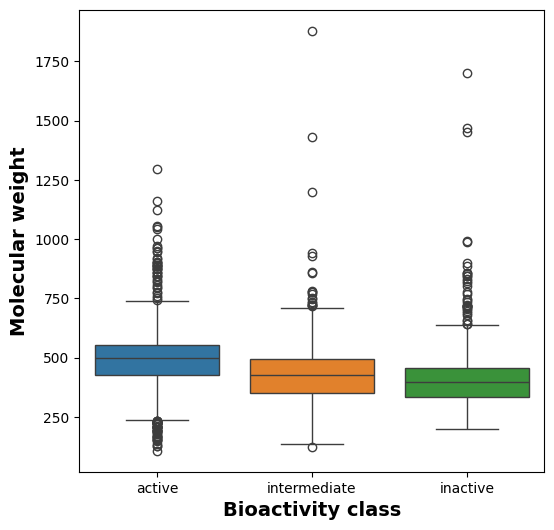

In [98]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df_final, x='class',y='MW', hue='class')
plt.xlabel('Bioactivity class', fontsize=14, fontweight= 'bold')
plt.ylabel('Molecular weight', fontsize=14, fontweight= 'bold')
plt.show()

In [99]:
kruskal_test('MW')

,Descriptor,Statistic,p,alpha,Interpretation
0,MW,413.829049,1.374560e-90,0.05,Different distribution (reject H0)


#Box Plot of LogP

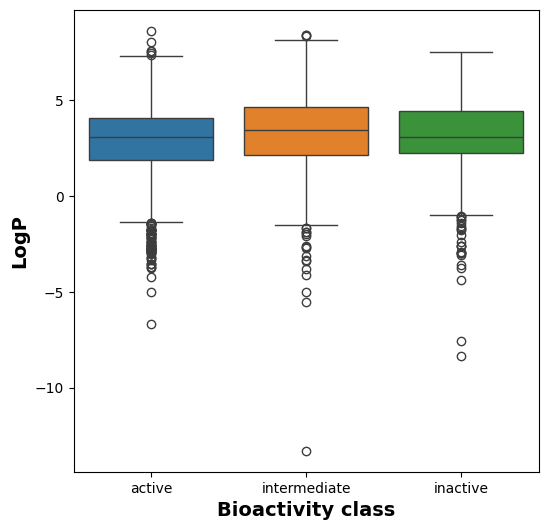

In [100]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df_final, x= 'class', y='LogP', hue='class')
plt.xlabel('Bioactivity class', fontsize=14, fontweight= 'bold')
plt.ylabel('LogP', fontsize=14, fontweight= 'bold')
plt.show()

In [101]:
kruskal_test('LogP')

,Descriptor,Statistic,p,alpha,Interpretation
0,LogP,41.603647,9.244485e-10,0.05,Different distribution (reject H0)


#Box Plot of Hydrogen donor

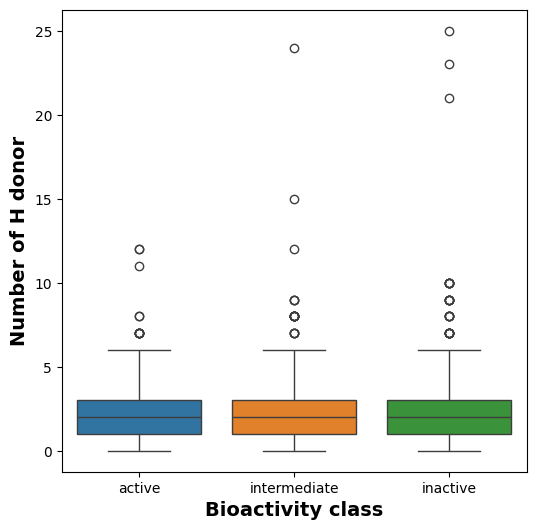

In [103]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df_final, x= 'class', y='NumHDonors', hue='class')
plt.xlabel('Bioactivity class', fontsize=14, fontweight= 'bold')
plt.ylabel('Number of H donor', fontsize=14, fontweight= 'bold')
plt.show()

In [104]:
kruskal_test('NumHDonors')

,Descriptor,Statistic,p,alpha,Interpretation
0,NumHDonors,18.511795,0.000096,0.05,Different distribution (reject H0)


#Box Plot of Hydrogen Acceptor

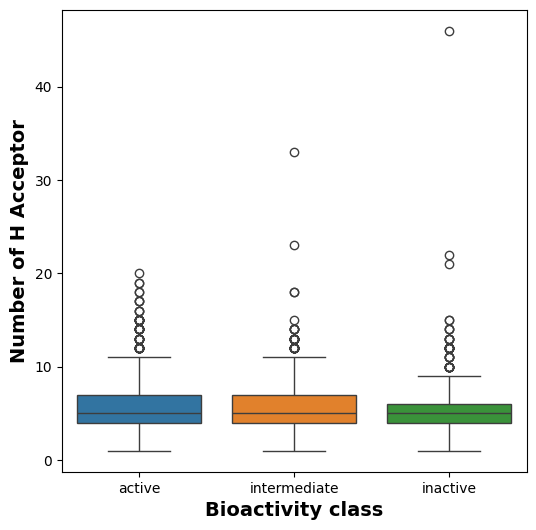

In [105]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df_final, x= 'class', y='NumHAcceptors', hue='class')
plt.xlabel('Bioactivity class', fontsize=14, fontweight= 'bold')
plt.ylabel('Number of H Acceptor', fontsize=14, fontweight= 'bold')
plt.show()

In [106]:
kruskal_test('NumHAcceptors')

,Descriptor,Statistic,p,alpha,Interpretation
0,NumHAcceptors,49.052913,2.229951e-11,0.05,Different distribution (reject H0)
